<font size=8> Network Tests


In [37]:
#Common Python Packages
from pickle import TRUE
import pickle
import os
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + '/..')

#my imports
from adaptation_lib.spike_stats import *
from adaptation_lib.dynapse_setup import *
from adaptation_lib.graphing import *
from configs import neuron_configs_bio

# Determine the user's home directory
home_directory = os.path.expanduser("~")
# Path to the Documents directory
documents_path = os.path.join(home_directory, "Documents")
# Path to the dynapse-se2-data directory within Documents
save_directory_path = os.path.join(documents_path, "dynapse-se2-data")
# Path to the data
data_type_path = os.path.join(save_directory_path, "network_heatmaps")
# path to unload figure file
figure_path = os.path.join(save_directory_path, "Figures")


<font size=8> Load Data


In [38]:
data_type_path = os.path.join(data_type_path, "Sweep_00")
data_path_1 = os.path.join(data_type_path, "EI_sweep_PC_PC_poisson.npy")
data_1 = np.load(data_path_1, allow_pickle=True).item()
data_path_3 = os.path.join(data_type_path, "EI_sweep_PC_PV_poisson.npy")
data_3 = np.load(data_path_3, allow_pickle=True).item()
data_path_2 = os.path.join(data_type_path, "EI_sweep_PC_PC_regular.npy")
data_2 = np.load(data_path_2, allow_pickle=True).item()
data_path_4 = os.path.join(data_type_path, "EI_sweep_PC_PV_regular.npy")
data_4 = np.load(data_path_4, allow_pickle=True).item()



In [49]:
print(data_1.keys())
print(type(data_1['cv_values_pc']))
print(len(data_1['in_freq']))
print(len(data_1['PC_PC']))
print(len(data_1['cv_values_pc']))
cv_1 = data_1['cv_values_pc']
cv_1= np.asanyarray(cv_1)

dict_keys(['cv_values_pc', 'cv_values_pv', 'synchrony_values_pc', 'synchrony_values_pv', 'mean_pc_rates', 'in_freq', 'PC_PC'])
<class 'list'>
30
6
180


<font size=6> Single Graphs

In [68]:
TITLE_SIZE=25
TICK_SIZE=15
LABEL_SIZE=18
data=cv_1
title='cv'
connection='PC_PC'

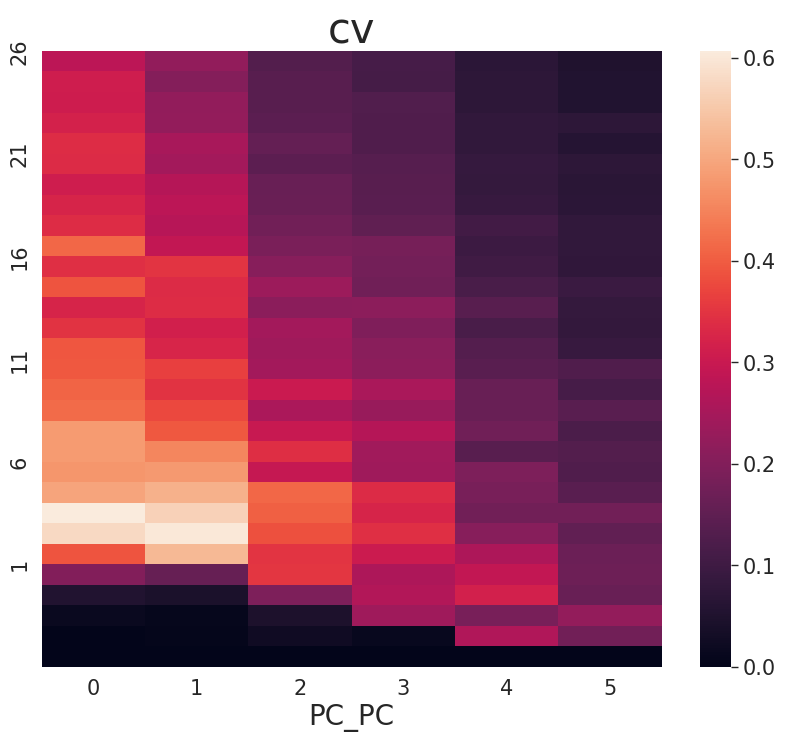

In [74]:
def heatamp_single(data, connection, title,input_type):
    data = np.asanyarray(data)
    data = np.reshape(data,(30, 6))
    data = np.flipud(data)
    sns.set_theme()
    sns.set_context("paper")
    sns.set_style("whitegrid")
    sns.set_palette("husl")
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data, ax=ax)
    plt.title(title, fontsize=TITLE_SIZE)
    plt.xlabel(connection, fontsize=LABEL_SIZE)
    plt.xticks(fontsize=TICK_SIZE)
    #only show every 5th y tick
    plt.yticks(np.arange(0, 30, 5), labels=np.flipud(data_1['in_freq'][0::5]), fontsize=TICK_SIZE)
    plt.yticks(fontsize=TICK_SIZE)
    #change the size of the ticks in the colorbar
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=TICK_SIZE)
    #save the figure
    plt.savefig(os.path.join(figure_path, 'heatmap_' + connection + '_' + title + '_' + input_type + '.pdf'))
    plt.show()

heatamp_single(data_1['cv_values_pc'], 'PC_PC', 'cv', 'poisson')

<font size=6> Poisson PC PC


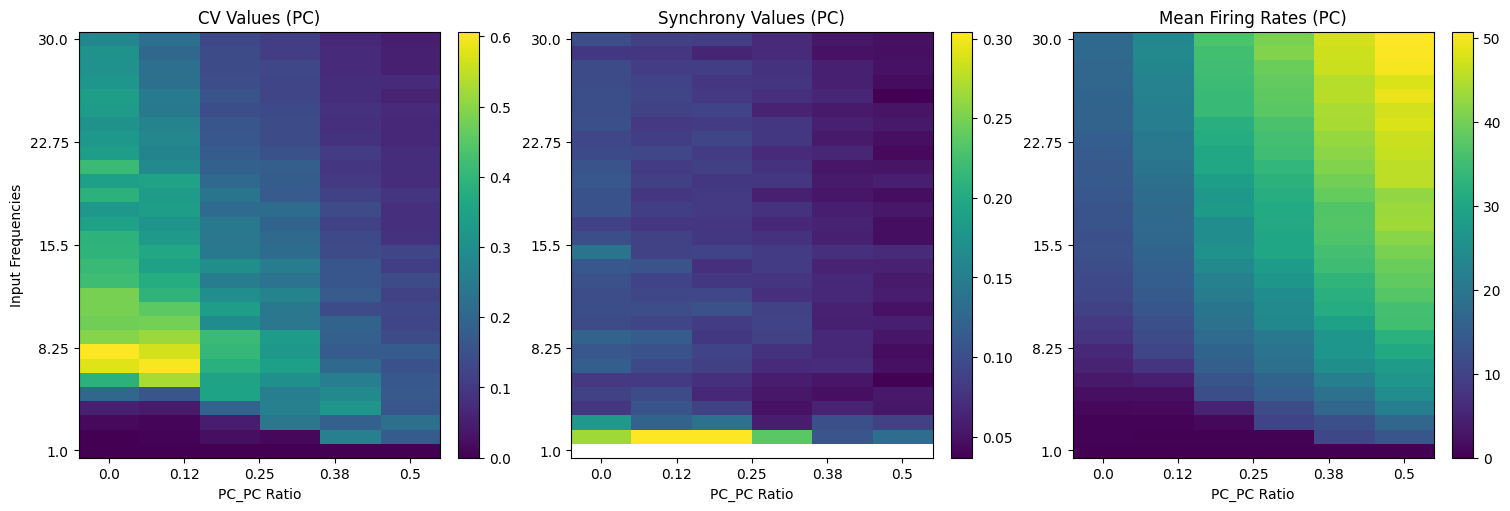

In [10]:

plot_3_heatmaps(data_1, 'PC_PC Ratio')

<font size=6> Poisson PC PV


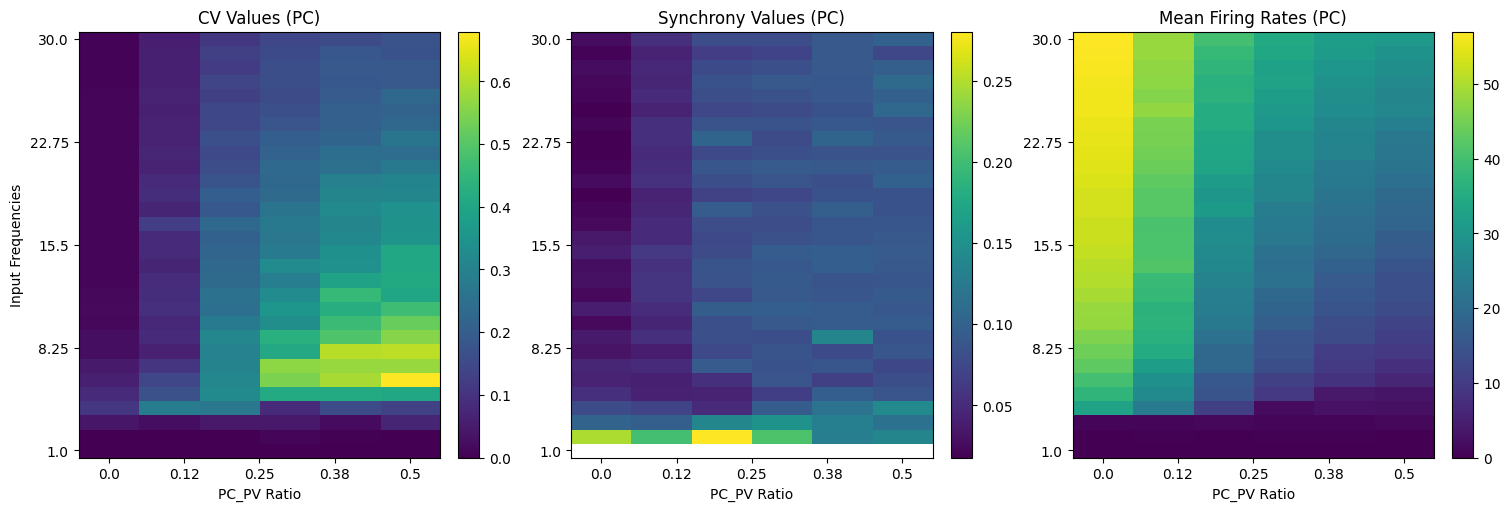

In [11]:

plot_3_heatmaps(data_3, 'PC_PV Ratio')

<font size=6> Regular PC PC


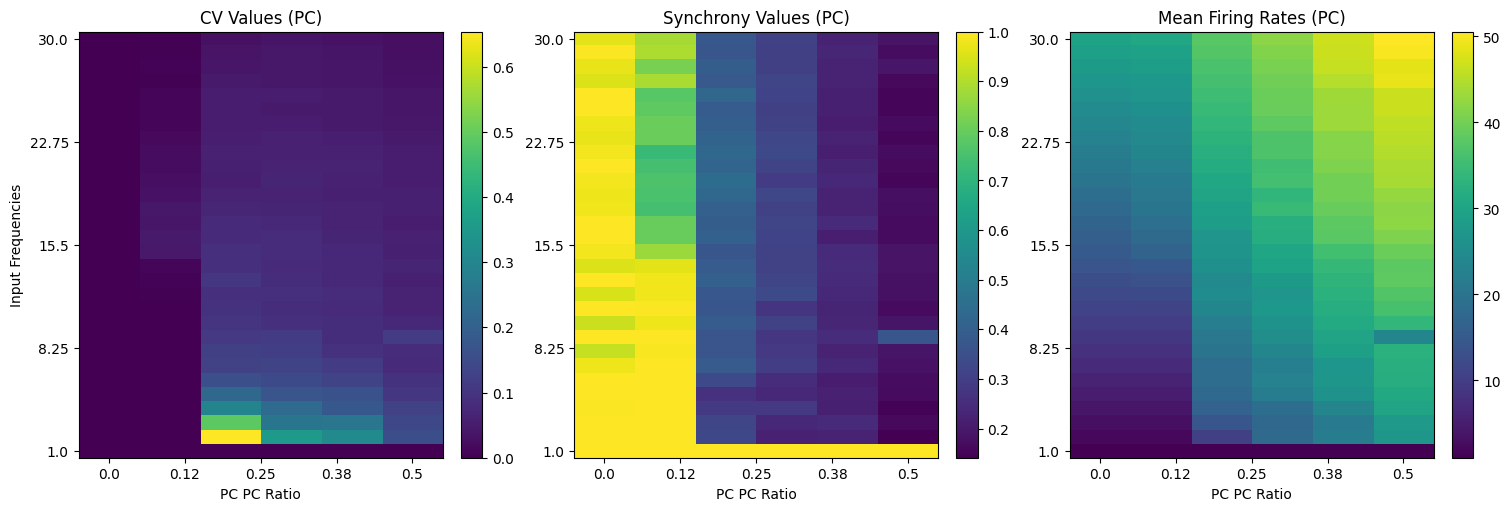

In [12]:

plot_3_heatmaps(data_2, 'PC PC Ratio')


<font size=6> Regular PC PV


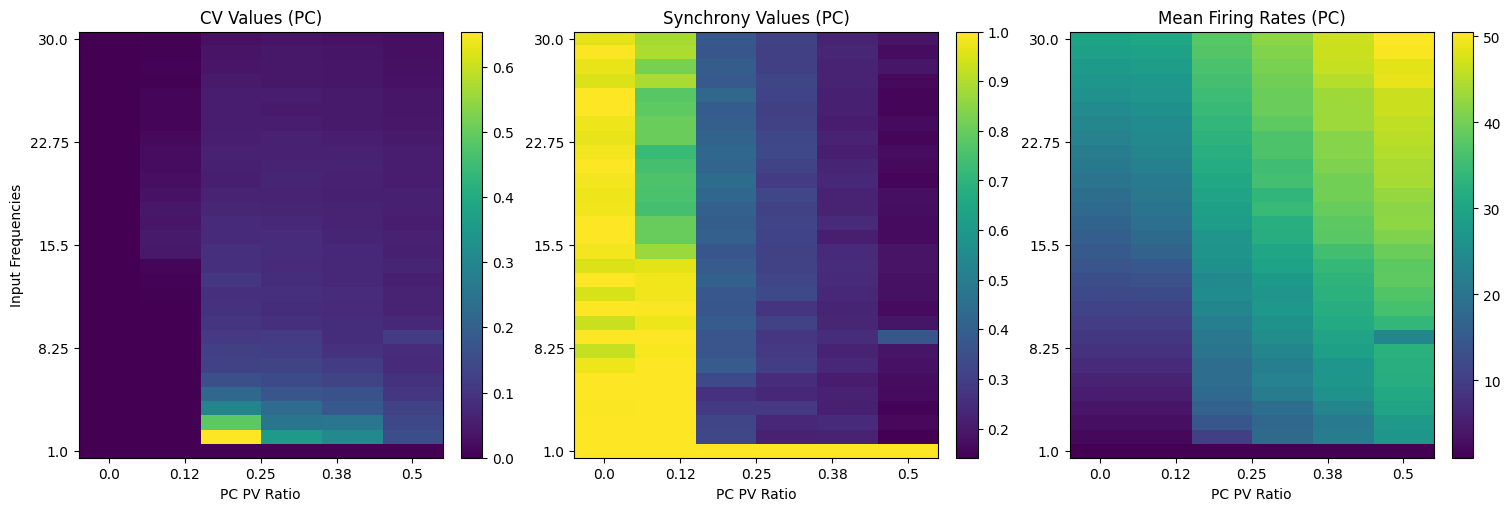

In [14]:

plot_3_heatmaps(data_2, 'PC PV Ratio')



<font size=6> Combined visualization

In [15]:
def plot_combined_heatmaps(data_dicts, xlabels, ytitles, tick_fontsize=10, title_fontsize=12, label_fontsize=10, colorbar_size=0.046, row_spacing=0.04, ratiolimit=.7):
    # Set the figure and GridSpec
    fig = plt.figure(figsize=(35, 10))
    width=5
    gs = gridspec.GridSpec(2, 10, width_ratios=[width, width, width, 0.0005, 0.0005, width, width, width, 0.00001, 0.00001])  # Add additional columns for spacing

    # Add this line to adjust the space between all subplots
    plt.subplots_adjust(wspace=0.4,hspace=0.3)

    # Titles for each column
    col_titles = ['CV Values', 'Synchrony Values', 'Mean Firing Rates', '', '', 'CV Values', 'Synchrony Values', 'Mean Firing Rates', '', '']

    # Set subplot titles and axis labels
    for i in range(2):
        for j in range(10):  # Adjust for additional columns
            ax = plt.subplot(gs[i, j])
            if i == 0:  # Set column titles for the first row
                ax.set_title(col_titles[j], fontsize=label_fontsize, pad=12)
            ax.set_xlabel(xlabels[i], fontsize=label_fontsize, labelpad=12)  # Set x-axis labels for every row based on the row index
            if j == 0 or j == 5: # Set y-axis labels for the first and sixth columns
                ax.set_ylabel('Input Frequencies', fontsize=label_fontsize, labelpad=10)

    # Set the titles for each row
    fig.text(0.685, .99, 'Regular Input Train', va='center', ha='center', fontsize=title_fontsize)
    fig.text(0.285, .99, 'Poisson Input Train', va='center', ha='center', fontsize=title_fontsize)

    # Plot heatmaps for each data dictionary
    for i, data in enumerate(data_dicts):
        # Create a mask to limit the data up to a certain connection ratio
        #if ratiolimit < 1:
        #    mask = data['connection_ratios'] <= ratiolimit
        #    data['connection_ratios'] = data['connection_ratios'][mask]
        #    for key in ['cv_values_pc', 'synchrony_values_pc', 'mean_pc_rates']:
        #        data[key] = np.reshape(data[key], (len(data['in_freq']), len(data['connection_ratios'])))[mask]

        # Set the ticks for the x axis (same for each row)
        xticks = np.linspace(0, len(data['connection_ratios']) - 1, min(5, len(data['connection_ratios'])))
        xticklabels = np.round(np.linspace(data['connection_ratios'][0], data['connection_ratios'][-1], min(5, len(data['connection_ratios']))), 2)
        
        # Prepare data matrices
        matrices = [np.flipud(np.reshape(data[key], (len(data['in_freq']), len(data['connection_ratios'])))) for key in ['cv_values_pc', 'synchrony_values_pc', 'mean_pc_rates']]
        
        # Plot heatmaps
        for j, matrix in enumerate(matrices):
            ax = plt.subplot(gs[i//2, j + (i%2)*5])  # Adjust for additional columns
            cax = ax.matshow(matrix, interpolation='nearest', aspect='auto')
            # Add colorbars, adjusted if necessary
            fig.colorbar(cax, ax=ax, fraction=colorbar_size, pad=0.04)
            # Set the ticks for the x axis
            ax.xaxis.set_ticks_position('bottom')
            ax.set_xticks(xticks)
            ax.set_xticklabels(xticklabels, fontsize=tick_fontsize)
            # Set the ticks for the y axis
            yticks = np.linspace(0, len(data['in_freq']) - 1, min(5, len(data['in_freq'])))
            yticklabels = np.round(np.linspace(data['in_freq'][0], data['in_freq'][-1], min(5, len(data['in_freq'])))[::-1]).astype(int)
            ax.set_yticks(yticks)
            ax.set_yticklabels(yticklabels, fontsize=tick_fontsize)

    # Hide the fourth, fifth, ninth, and tenth columns (index 3, 4, 8, and 9) of each row
    for i in range(2):
        plt.subplot(gs[i, 3]).axis('off')
        plt.subplot(gs[i, 4]).axis('off')
        plt.subplot(gs[i, 8]).axis('off')
        plt.subplot(gs[i, 9]).axis('off')
    # Specify the filename for the PDF
    filename = 'heatmaps.pdf'
    data_path= os.path.join(figure_path, filename)
    # Combine the directory path and filename to form the full path

    # Save the figure to a PDF file using the full path
    plt.savefig(data_path, format='pdf', dpi=300, bbox_inches='tight')
    plt.show()

In [16]:
data_1=np.load(data_path_1, allow_pickle=True).item()
data_2=np.load(data_path_2, allow_pickle=True).item()
data_3=np.load(data_path_3, allow_pickle=True).item()
data_4=np.load(data_path_4, allow_pickle=True).item()
#Rename keys to conneciton ratios
data_1['connection_ratios'] = data_1.pop('PC_PC')
data_2['connection_ratios'] = data_2.pop('PC_PC')
data_3['connection_ratios'] = data_3.pop('PC_PV')
data_4['connection_ratios'] = data_4.pop('PC_PV')
data_dicts = [data_1, data_2, data_3, data_4]
xlabels = ['PC PC', 'PC PV', 'PC PC', 'PC PV']
ytitles = ['Regular', 'Poisson']



In [17]:
data_1.keys()

dict_keys(['cv_values_pc', 'cv_values_pv', 'synchrony_values_pc', 'synchrony_values_pv', 'mean_pc_rates', 'in_freq', 'connection_ratios'])

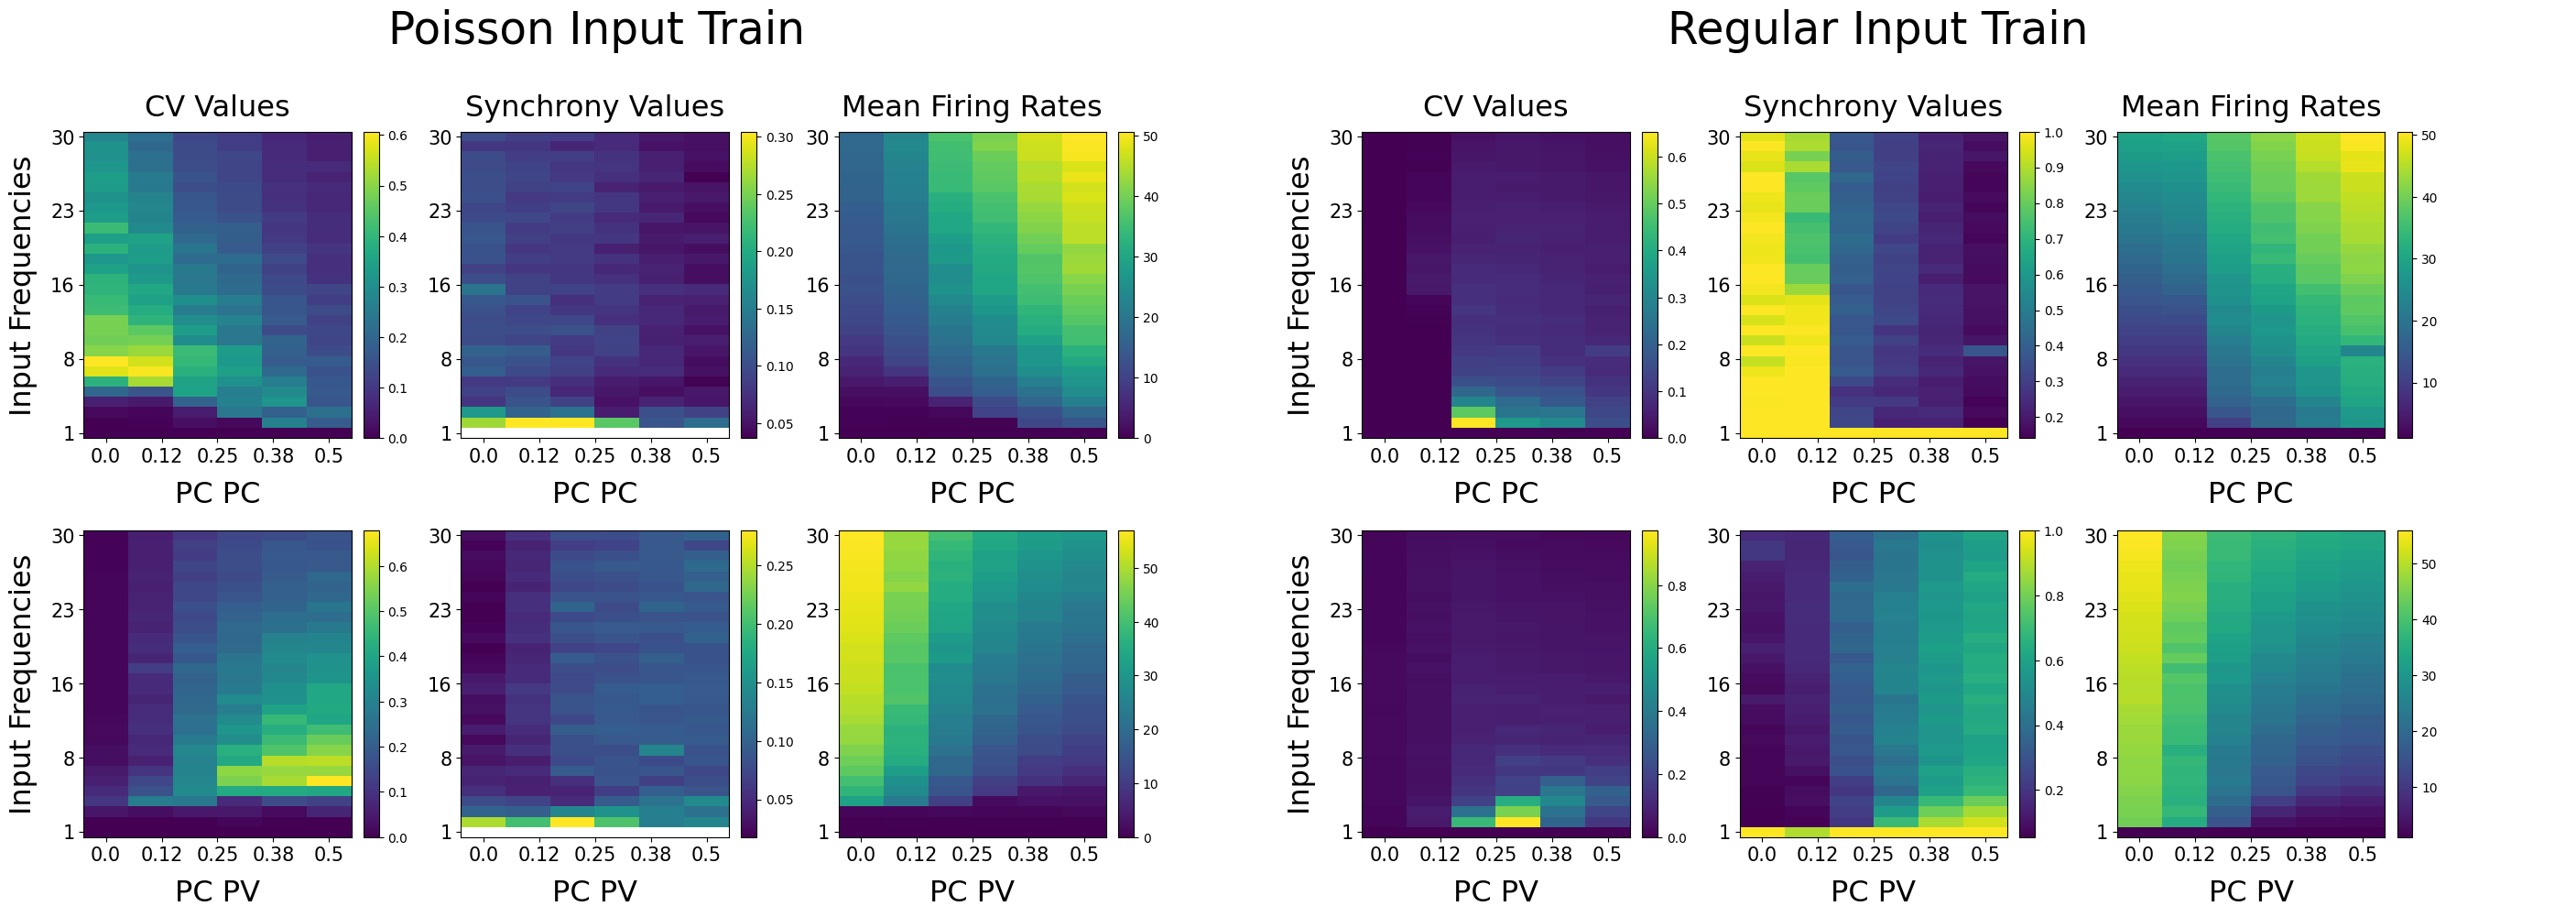

In [18]:
plot_combined_heatmaps(data_dicts, xlabels, ytitles, tick_fontsize=15, title_fontsize=35, label_fontsize=23, colorbar_size=0.08, row_spacing=1)
